In [2]:
# import packages
import networkx as nx
import scipy.stats as sps
import numpy as np                                                                 
import random as rd   
import pandas as pd
import matplotlib.pyplot as plt                                                    
import warnings 

In [3]:
df = pd.read_csv('df_web_extracted_DAG.csv')

In [4]:
D = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr=None, create_using=nx.DiGraph)

In [5]:
D.number_of_nodes()

1439

In [6]:
D.number_of_edges()

3862

In [7]:
G = D.to_undirected()

In [8]:
pr_G = nx.pagerank(G, personalization = None, alpha = 0.85)
pr_Ga = np.array(list(pr_G.values()))
print(pr_Ga)

[0.01846811 0.01975631 0.00075832 ... 0.00060177 0.00042185 0.00021412]


In [9]:
pr_D = nx.pagerank(D, personalization = None, alpha = 0.85)
pr_Da = np.array(list(pr_D.values()))
print(pr_Da)

[0.05384583 0.10950242 0.00313788 ... 0.00016894 0.00016894 0.00016894]


In [10]:
sps.shapiro(pr_Ga)

ShapiroResult(statistic=0.3080976605415344, pvalue=0.0)

In [11]:
sps.shapiro(pr_Da)

ShapiroResult(statistic=0.09613245725631714, pvalue=0.0)

In [12]:
node_num = 1000  # the number of nodes you would like to confirm (exogeneous varible)
boundary = D.number_of_nodes() - node_num
allnodes = list(nx.nodes(D))
newnodes = [e for e in allnodes if e >= boundary]
oldnodes = [e for e in allnodes if e < boundary]

D_init = D.subgraph(oldnodes)

In [13]:
def random_path(D, start_at):
    node = start_at
    path = [node]
    while True:
        to = D[node]
        if len(to) == 0: break
        node = np.random.choice(list(to))
        path.append(node)
    return path

In [154]:
max_num = 20 # the number of running the two-path mechanism in each period (i.e., beta as exogeneous varible)
repeat_num = 10 
ans_listsD = []
ans_listsG = []
for j in range(max_num): # for different number of running the two-path mechanism in each period
    ans_listD = []
    ans_listG = []
    for k in range(repeat_num): # for 10 samples in each period
        reviewers = []
        for i in range(node_num): # for each period    
            repeat = 0
            while repeat < j + 1:
                newnode = i + boundary
                candidates = [e for e in allnodes if e < newnode]
                x = np.random.choice(candidates)
                px = random_path(D, x)
                sx = set(px)
                y = np.random.choice(candidates)
                py = random_path(D, y)
                sy = set(py)
                reviewers += list(sx | sy) #note that, for our dataset, the two paths must intersect in node 0.
                repeat += 1
        reviewers_num = []
        for l in range(D.number_of_nodes()):
            count = reviewers.count(l)
            reviewers_num.append(count)
        ansD = list(sps.spearmanr(pr_Da, reviewers_num))[0]
        ansG = list(sps.spearmanr(pr_Ga, reviewers_num))[0]
        ans_listD.append(ansD)
        ans_listG.append(ansG)
    print('Computing ' + str(repeat_num) + ' correlation coefficients in case of ' + str(j + 1) + ' two-path mechanism in each period')
    ans_listsD.append(ans_listD)
    ans_listsG.append(ans_listG)
print(ans_listsD)
print(ans_listsG)

Computing 10 correlation coefficients in case of 1 two-path mechanism in each period
Computing 10 correlation coefficients in case of 2 two-path mechanism in each period
Computing 10 correlation coefficients in case of 3 two-path mechanism in each period
Computing 10 correlation coefficients in case of 4 two-path mechanism in each period
Computing 10 correlation coefficients in case of 5 two-path mechanism in each period
Computing 10 correlation coefficients in case of 6 two-path mechanism in each period
Computing 10 correlation coefficients in case of 7 two-path mechanism in each period
Computing 10 correlation coefficients in case of 8 two-path mechanism in each period
Computing 10 correlation coefficients in case of 9 two-path mechanism in each period
Computing 10 correlation coefficients in case of 10 two-path mechanism in each period
Computing 10 correlation coefficients in case of 11 two-path mechanism in each period
Computing 10 correlation coefficients in case of 12 two-path me

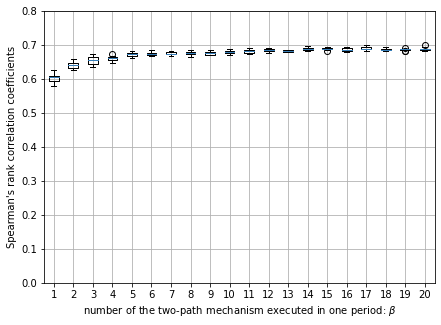

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))

bp = ax.boxplot(ans_listsD, medianprops=dict(color='#377eb8'))
xlabels = []
for i in range(max_num):
    count = i + 1 
    xlabels.append(str(count))
ax.set_xticklabels(xlabels)

#plt.title('Box plot')
plt.xlabel(r'number of the two-path mechanism executed in one period: $\beta$')
plt.ylabel('Spearman\'s rank correlation coefficients')

plt.ylim([0.0,0.8])
#plt.ylim([0.0,1.0])
plt.grid()

plt.savefig('experiment3_webpageD.png', format = 'png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

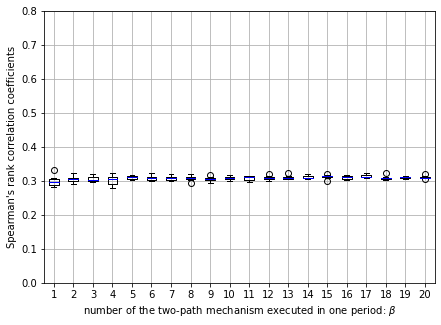

In [172]:
fig, ax = plt.subplots(figsize=(7, 5))

bp = ax.boxplot(ans_listsG, medianprops=dict(color='#377eb8'))
xlabels = []
for i in range(max_num):
    count = i + 1 
    xlabels.append(str(count))
ax.set_xticklabels(xlabels)

#plt.title('Box plot')
plt.xlabel(r'number of the two-path mechanism executed in one period: $\beta$')
plt.ylabel('Spearman\'s rank correlation coefficients')

plt.ylim([0.0,0.8])
#plt.ylim([0.0,1.0])
plt.grid()

plt.savefig('experiment3_webpageG.png', format = 'png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()